In [1]:
# The k means clustering searches for a predetermined numbers of clusters within an unlabeld
# multidimensional dataset

In [3]:
# Let's first generate 2D dataset containing 4 distinct blobs.

In [5]:
import matplotlib.pyplot as plt

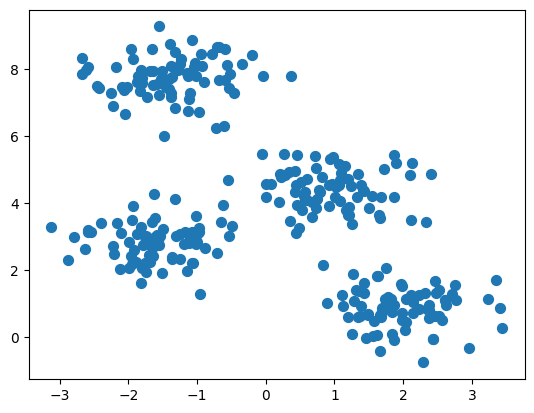

In [6]:
from sklearn.datasets._samples_generator import make_blobs
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(x[:, 0], x[:, 1], s=50)

In [7]:
# k-means algo automatically picks clusters

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
# Let's visualize the results by plotting the data colored by these labels

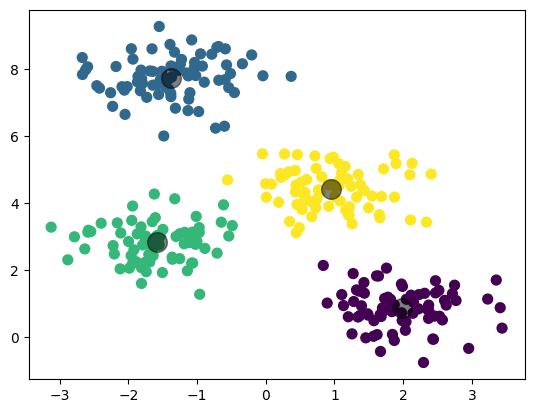

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [11]:
# A typical approach to kmeans involves an intuitive approach known as expectation-maximization

In [12]:
# K-MEANS ALGORITHM : EXPECTATION-MAXIMIZATION

In [14]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

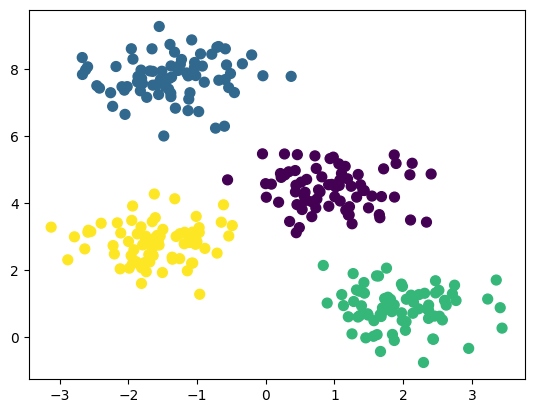

In [15]:
def find_clusters(x, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(x, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([x[labels==i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(x, 4)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')

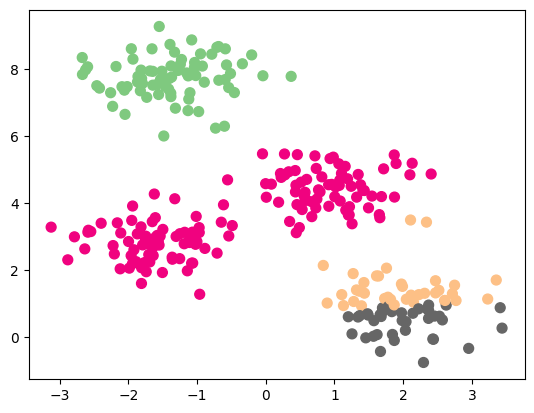

In [17]:
centers, labels = find_clusters(x, 4, rseed=0)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='Accent')

In [18]:
# The number of clusters must be selected before hand

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


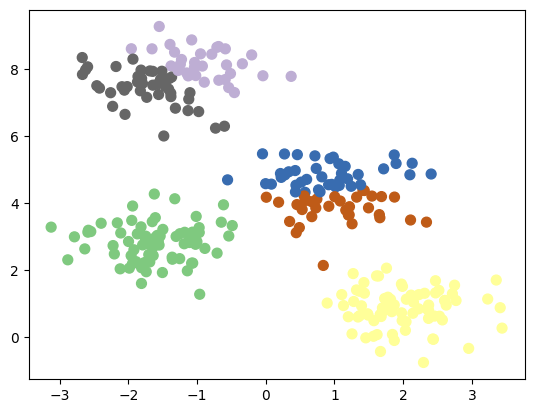

In [19]:
labels = KMeans(6, random_state=0).fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=labels, s=50, cmap='Accent')

In [20]:
# k-means is limited to linear cluster boundaries

In [21]:
from sklearn.datasets import make_moons
x, y = make_moons(200, noise=0.05, random_state=0)

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


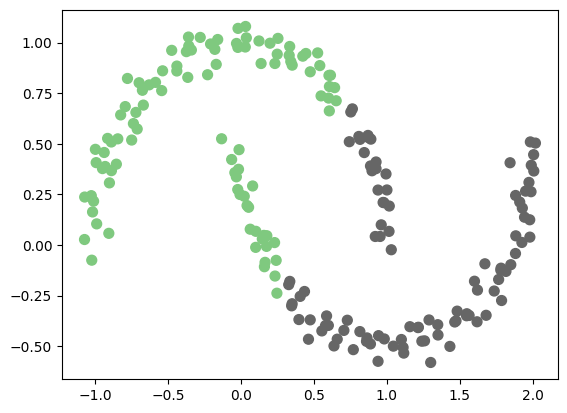

In [22]:
labels = KMeans(2, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='Accent')

In [23]:
# KMeans fails with non-linear boundaries

In [24]:
# Kernelized k means

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


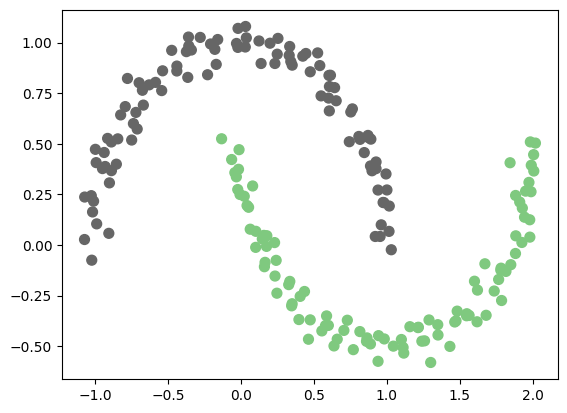

In [26]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='Accent')

In [27]:
# We see that with kernel transform approach, the kernelized k-means is able to find more
# complicated non-linear boundaries between clusters

In [28]:
# k-means can be slow for large number of samples

In [29]:
# Example 1 : KMeans on digits

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [31]:
# The clustering can be performed as below

In [32]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

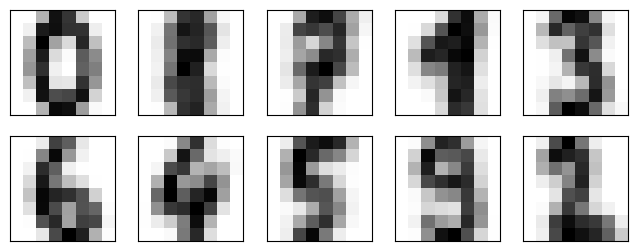

In [33]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [34]:
from scipy.stats import mode

In [35]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

C:\Users\Family\AppData\Local\Temp\ipykernel_27060\2407276919.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [36]:
# Now we can check how accurate our unsupervised clustering was in finding similar
# digits within data

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

In [39]:
# With just a simple k-means algorithm we discovered the correct grouping for 80% of the input digits

In [40]:
import seaborn as sns

Text(113.9222222222222, 0.5, 'predicted label')

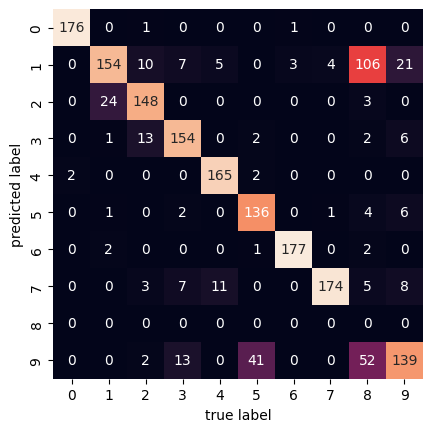

In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [43]:
# We can use the  t-distributed stochastic neighbor embedding t-SNE algorithm to preprocess the data
# before preforming k-means

In [45]:
from sklearn.manifold import TSNE

In [46]:
# Project the data: this step will take several seconds

In [47]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

In [48]:
# computer the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [49]:
# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]

C:\Users\Family\AppData\Local\Temp\ipykernel_27060\2909638888.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [50]:
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9449081803005008

In [51]:
# That's almost 95% accuracy without using the labels,
# that's the power of unsupervised learning when used carefully
# it can extract the information from the dataset that might be difficult
# to do by hand or by eye

In [52]:
# EXAMPLE KMEANS FOR COLOR COMPRESSION:

In [53]:
from sklearn.datasets import load_sample_image

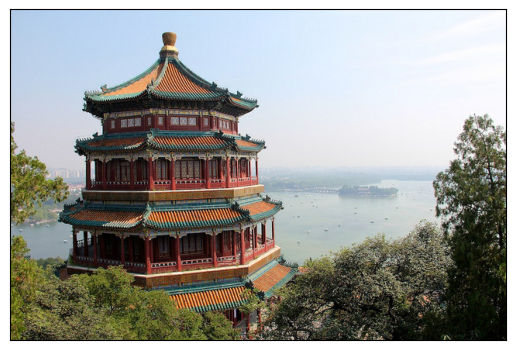

In [58]:
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [59]:
china.shape

(427, 640, 3)

In [61]:
# The image is stored in 3D array.
# One way we can view this set of pixels is as cloud of points
# in a 3D color space

In [63]:
data = china/255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [64]:
# We can visualize these pixesl in this color space using a subset of 10,000 pixels for efficiency

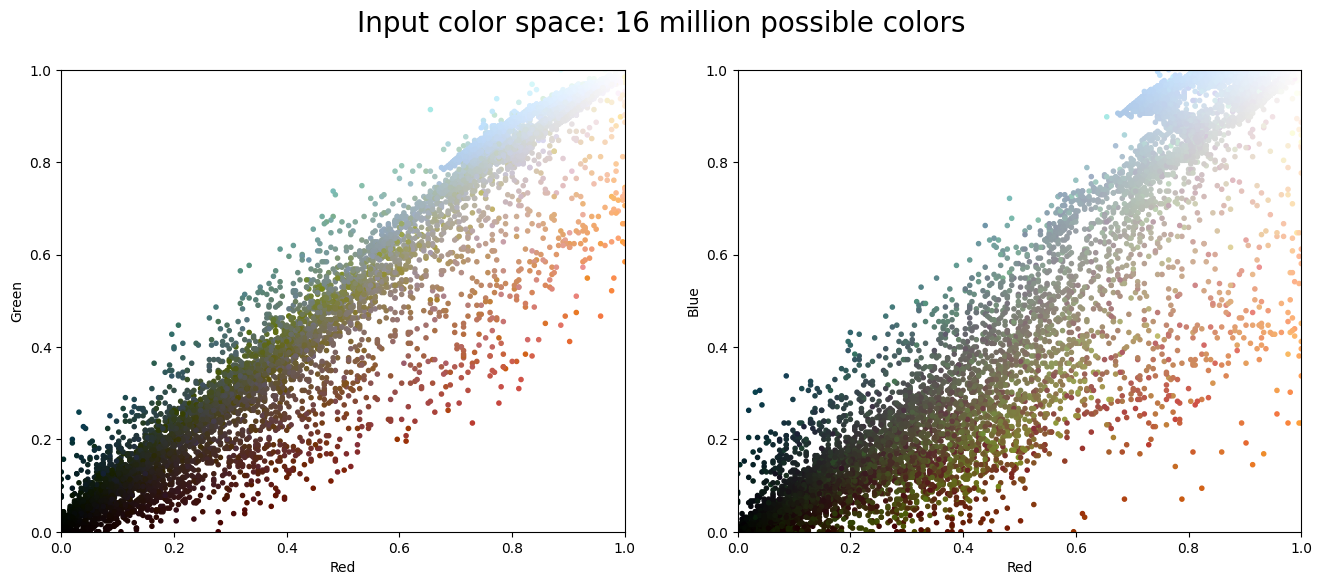

In [73]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, c=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))

    ax[1].scatter(R, B, c=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))

    fig.suptitle(title, size=20)

    
plot_pixels(data, title='Input color space: 16 million possible colors')

In [75]:
# Now lets reduce these 16 million colors to 16 colors, using kmeans clustering
# across the pixel space

In [76]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


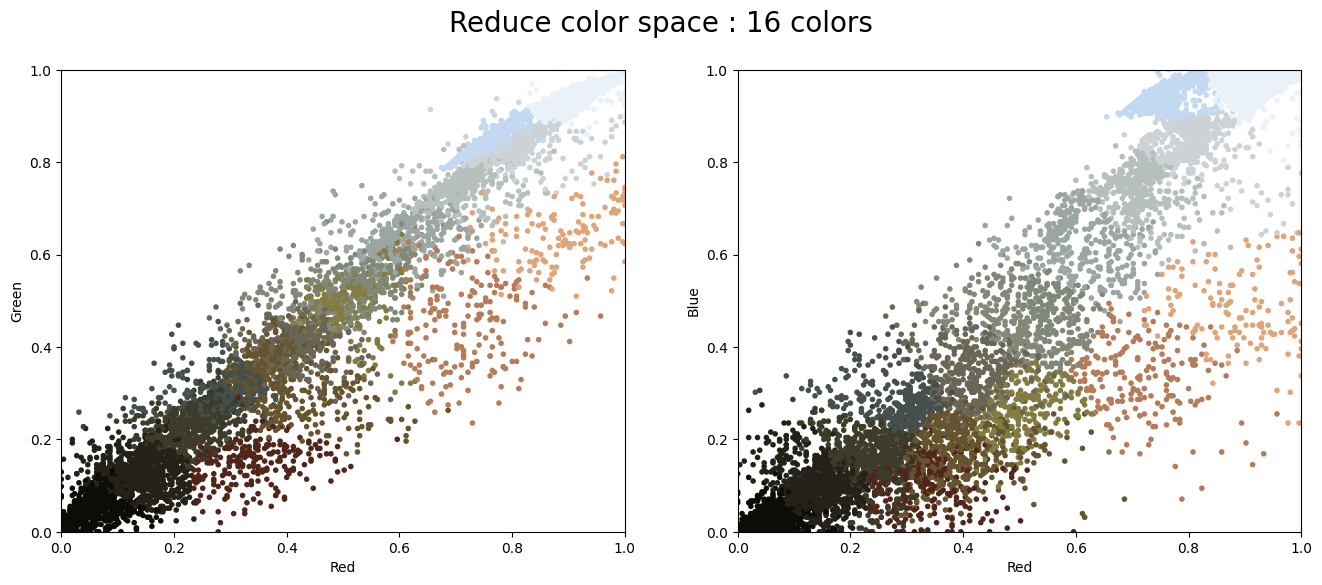

In [77]:
plot_pixels(data, colors=new_colors, title="Reduce color space : 16 colors")

In [78]:
# The result is the recoloring of the original pixels
# where each pixel is assigned the color of its closest cluster center

In [79]:
china_recolored = new_colors.reshape(china.shape)

Text(0.5, 1.0, '16-color Image')

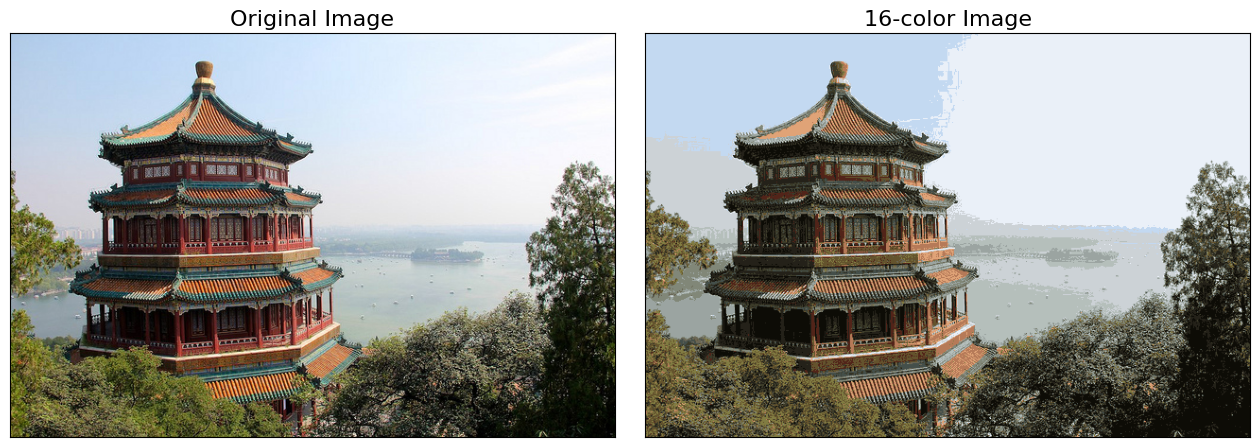

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)

In [82]:
# Some details are lost in the right panel but still image is largely recognizable
# This image on the right acheives a compression factor of around 1 million